In [1]:
num_of_lines=800

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

patient_level__ver_12_proj1_sn_5_13=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')

patient_level__ver_12_proj1_sn_5_13=pd.DataFrame(patient_level__ver_12_proj1_sn_5_13.iloc[:num_of_lines, :])


print(patient_level__ver_12_proj1_sn_5_13.shape)
patient_level__ver_12_proj1_sn_5_13.head()


(800, 70)


,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [3]:
no_age=patient_level__ver_12_proj1_sn_5_13[patient_level__ver_12_proj1_sn_5_13['age']!='NAN']
no_age.shape

(760, 70)

In [6]:
no_age.shape

(760, 70)

In [7]:
patient_level__ver_12_proj1_sn_5_13.isnull().sum(axis = 0)

ser_num           0
ICU_LOS           0
LOS_Group         0
ICU_mortality     0
HOSP_mortality    0
                 ..
EN_pro_day1/kg    0
EN_pro_day2/kg    0
EN_pro_day3/kg    0
EN_pro_day4/kg    0
EN_pro_day5/kg    0
Length: 70, dtype: int64

# select vars:

In [5]:
x1 = no_age[['BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','EN_pro_day0/kg','EN_pro_day1/kg','EN_pro_day2/kg','EN_pro_day3/kg','EN_pro_day4/kg','EN_pro_day5/kg']]
print(x1.shape)

(760, 12)


In [6]:
target = no_age[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


In [10]:
target.value_counts(normalize=True) * 100

ICU_mortality
0                75.789474
1                24.210526
dtype: float64

LabelEncoder:

# train_test_split

In [7]:

from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, target, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
452,27.343750,0,0,1,1,1,0.510400,0.905143,1.151029,1.275429,1.011486,0.761686
697,30.864198,0,0,0,1,1,0.282333,0.528000,0.529467,0.073613,0.257256,0.473864
546,21.484375,0,0,0,0,0,1.106303,1.658182,1.560303,1.702400,1.989818,1.989818
252,36.332180,40,1,0,1,1,0.020267,0.632006,1.030585,1.042286,0.708610,1.080648
400,29.411765,0,1,1,0,0,1.145325,1.103302,1.061647,1.061647,0.900925,0.900188


# models review:

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def stats(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    score = f1_score(y_test, y_pred, average='binary')
    print('accuracy_score: %.3f' % accuracy)
    print('recall: %.3f' % recall)
    print('precision: %.3f' % precision)
    print('F-Measure: %.3f' % score)
    print('roc_auc_score: %.3f' % roc_auc_score(y_test,y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
    print('auc score: %.3f' % metrics.auc(fpr, tpr))

In [9]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection # for command model_selection.cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



results = []
names = []
for name, model in models:
    
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)

    
    print('---------%s---------' % name)
    stats(y_test,y_pred)

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and bei

---------LR---------
accuracy_score: 0.737
recall: 0.000
precision: 0.000
F-Measure: 0.000
roc_auc_score: 0.500
auc score: nan
---------LDA---------
accuracy_score: 0.737
recall: 0.000
precision: 0.000
F-Measure: 0.000
roc_auc_score: 0.500
auc score: nan
---------KNN---------
accuracy_score: 0.684
recall: 0.050
precision: 0.167
F-Measure: 0.077
roc_auc_score: 0.480
auc score: nan
---------DT---------
accuracy_score: 0.658
recall: 0.367
precision: 0.355
F-Measure: 0.361
roc_auc_score: 0.564
auc score: nan
---------RF---------
accuracy_score: 0.697
recall: 0.067
precision: 0.235
F-Measure: 0.104
roc_auc_score: 0.495
auc score: nan
---------NB---------
accuracy_score: 0.693
recall: 0.200
precision: 0.353
F-Measure: 0.255
roc_auc_score: 0.535
auc score: nan
---------SVM---------
accuracy_score: 0.737
recall: 0.000
precision: 0.000
F-Measure: 0.000
roc_auc_score: 0.500
auc score: nan


c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [16]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# transform data
#x_train2 = scaler.fit_transform(x_train)
#x_test2 = scaler.fit_transform(x_test)

# roc to fix

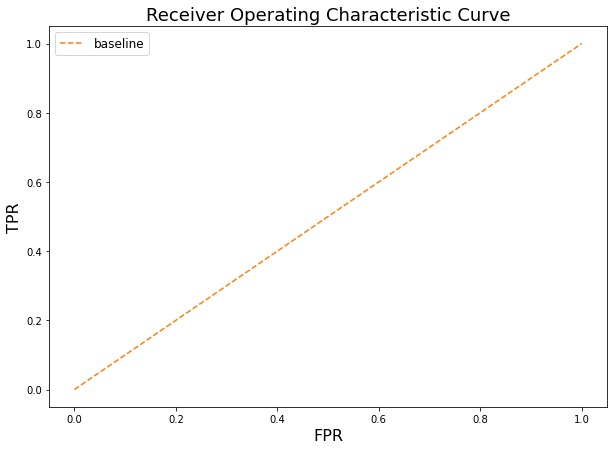

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

models = []

models.append(('DT', DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier()))
for name, model in models:
    
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    
    roc_values = []
    for thresh in np.linspace(0, 1, 100):
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        roc_values.append([tpr, fpr])
    tpr_values, fpr_values = zip(*roc_values)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(fpr_values, tpr_values)
    ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
    plt.title('Receiver Operating Characteristic Curve', fontsize=18)
    plt.ylabel('TPR', fontsize=16)
    plt.xlabel('FPR', fontsize=16)
    plt.legend(fontsize=12);




to fix!

In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 23
False Positives: 37
True Negatives: 131
False Negatives: 37


# DecisionTreeClassifier

In [17]:


dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)


Criterion=gini 0.6140350877192983
recall: 0.236
Criterion=entropy 0.6008771929824561
recall: 0.273


In [18]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

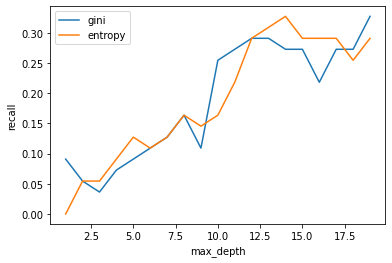

In [19]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
#parameters: targets to be predicted and predictions from new data used before

In [ ]:
#explain:

# visual tree:

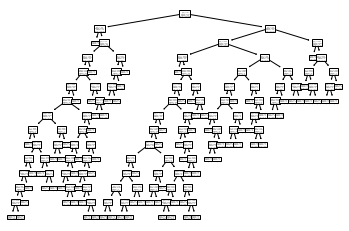

In [20]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=14)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

# RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 40, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

In [23]:
predictionforest = model.best_estimator_.predict(x_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

[[172   1]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       173
           1       0.00      0.00      0.00        55

    accuracy                           0.75       228
   macro avg       0.38      0.50      0.43       228
weighted avg       0.57      0.75      0.65       228



(266, 8)

(266,)

0.55

Criterion=gini 0.575
Criterion=entropy 0.525


0.6625